**Standardization and Normalization**

- Standardization and Normalization are two methods to convert data value into same scale

- It is also called scaling of data

- In the data we have many columns are there, each column has different units as well as different values

- For example you have age and salary, age is very minimal number two digit number

- And salary is kind of 5 digit number

- When you multiply 2 digit number with 5 digit number it involves some complexity

- Imagine you are multiplying both are single digit number, this involves less complexity

- Scaling converts all the data into a same scale

- Standardization:
    
    - It is also called Z-score or Z-scale
    
    - It ranges -3 to 3
    
    - The mean =0 and std=1

<img class="XqHOTb IGEbUc" alt="Z = \frac{x - \mu}{\sigma}" src="https://www.gstatic.com/education/formulas2/553212783/en/z_score.svg" role="img" data-csiid="25" data-atf="0">



 **Normalization**
 
- Min max scalar 

- Normalization converts data into 0 to 1 range

- min value =0 and max value =1

- It mainly use in Deep learning for the image scaling

- Generally images are color images the pixel value ranges from 0 to 255

- We Normalize the values into 0 to 1

- The value might be change but information never change

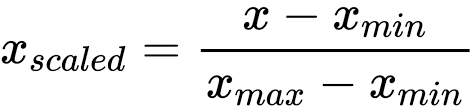

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\rohan venkata sai\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
file_locations="C:\\Users\\rohan venkata sai\\Desktop\\Data Science & AI\\Data files\\Visadataset.csv"
visa_df=pd.read_csv(file_locations)
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**Z-score**

- Step-1: we read a specific column (prevailing_wage)

- step-2: calculate mean of the column
    
- Step-3: calculate std of the column

- step-4: Nr=column-mean

- step-5: Nr/std

In [6]:
mean=visa_df['prevailing_wage'].mean()
std=visa_df['prevailing_wage'].std()
Nr=visa_df['prevailing_wage']-mean
out=Nr/std
visa_df['prevailing_wage_Zscore']=out

In [7]:
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_Zscore
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398510
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169832
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919060
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169991
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428576


In [16]:
max_original=visa_df['prevailing_wage'].max()
max_z=visa_df['prevailing_wage_Zscore'].max()
max_original,max_z

(319210.27, 4.634101837909889)

In [17]:
visa_df['prevailing_wage'].idxmax()
# prevailing_wage column has maximum value at 21077 ID

21077

In [18]:
visa_df['prevailing_wage_Zscore'].idxmax()
# prevailing_wage_Zscore column has maximum value at 21077 ID

21077

In [19]:
visa_df.iloc[[21077]]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_Zscore
21077,EZYV21078,Asia,High School,N,N,442,2006,Midwest,319210.27,Year,Y,Denied,4.634102


In [22]:
min_original=visa_df['prevailing_wage'].min()
min_z=visa_df['prevailing_wage_Zscore'].min()
print(min_original,min_z)
print(visa_df['prevailing_wage'].idxmin())
print(visa_df['prevailing_wage_Zscore'].idxmin())

2.1367 -1.4096818992891176
20575
20575


**Infulential Outliers**

- Generaly outlier means very very huge observation , very very small observation

- If we found an observation as outlier before scaling

- The same observation again found as outlier after scaling

- Then that observation called influential outlier

- Some observation before scaling consider as outlier

- But after scaling it does not fall in outlier creteria

- At that time we might not consider that observation as outlier

- Z-score is used to identity influential outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x24762843750>,
 'caps': [<matplotlib.lines.Line2D at 0x24761b70510>,
 'boxes': [<matplotlib.lines.Line2D at 0x24762842390>],
 'medians': [<matplotlib.lines.Line2D at 0x24761b71d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2476285a590>],
 'means': []}

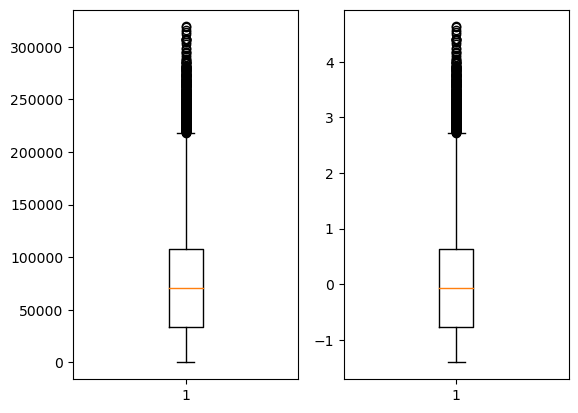

In [24]:
plt.subplot(1,2,1)
plt.boxplot(visa_df['prevailing_wage'])
plt.subplot(1,2,2)
plt.boxplot(visa_df['prevailing_wage_Zscore'])

In [34]:
# Read the data
file_locations="C:\\Users\\rohan venkata sai\\Desktop\\Data Science & AI\\Data files\\Visadataset.csv"
visa_df=pd.read_csv(file_locations)
# instead of LabelEncoder use StandardScalar
from sklearn.preprocessing import StandardScaler
# Save the package
ss=StandardScaler()
# Apply fit transform
visa_df['prevailing_wage_Zscore']=ss.fit_transform(visa_df[['prevailing_wage']])
visa_df[['prevailing_wage','prevailing_wage_Zscore']]

,prevailing_wage,prevailing_wage_Zscore
0,592.2029,-1.398537
1,83425.6500,0.169835
2,122996.8600,0.919079
3,83434.0300,0.169994
4,149907.3900,1.428604
...,...,...
25475,77092.5700,0.049924
25476,279174.7900,3.876159
25477,146298.8500,1.360280
25478,86154.7700,0.221509


### Normailization

- Step-1: Read the column

- Step-2: Calculate min value

- Step-3: Calculate max value

- Step-4: Nr=column-min()

- Step-5: Dr=Max-Min

- Step-6: out= Nr/Dr

- Step-7: Save in a new column  

In [38]:
file_locations="C:\\Users\\rohan venkata sai\\Desktop\\Data Science & AI\\Data files\\Visadataset.csv"
visa_df=pd.read_csv(file_locations)
minn=visa_df['prevailing_wage'].min()
maxx=visa_df['prevailing_wage'].max()
Nr=visa_df['prevailing_wage']-minn
Dr= maxx-minn
out=Nr/Dr
visa_df['prevailing_wage_norm']=out
visa_df[['prevailing_wage','prevailing_wage_norm']]

,prevailing_wage,prevailing_wage_norm
0,592.2029,0.001849
1,83425.6500,0.261345
2,122996.8600,0.385312
3,83434.0300,0.261371
4,149907.3900,0.469616
...,...,...
25475,77092.5700,0.241505
25476,279174.7900,0.874579
25477,146298.8500,0.458311
25478,86154.7700,0.269895


In [39]:
visa_df.iloc[[20575,21077]]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_norm
20575,EZYV20576,North America,Master's,N,N,1552,2004,Northeast,2.1367,Hour,Y,Certified,0.0
21077,EZYV21078,Asia,High School,N,N,442,2006,Midwest,319210.2700,Year,Y,Denied,1.0


**Using package: MinMaxScalar**

In [42]:
# Read the data
file_locations="C:\\Users\\rohan venkata sai\\Desktop\\Data Science & AI\\Data files\\Visadataset.csv"
visa_df=pd.read_csv(file_locations)
# instead of LabelEncoder use StandardScalar
from sklearn.preprocessing import MinMaxScaler
# Save the package
mms=MinMaxScaler()
# Apply fit transform
visa_df['prevailing_wage_norm']=mms.fit_transform(visa_df[['prevailing_wage']])
visa_df[['prevailing_wage','prevailing_wage_norm']]

,prevailing_wage,prevailing_wage_norm
0,592.2029,0.001849
1,83425.6500,0.261345
2,122996.8600,0.385312
3,83434.0300,0.261371
4,149907.3900,0.469616
...,...,...
25475,77092.5700,0.241505
25476,279174.7900,0.874579
25477,146298.8500,0.458311
25478,86154.7700,0.269895


### **fit_transform**

- There are two terms fit and transform

- If you see in Z-score
    
    - x: data
    
    - mean: mean of data
    
    - std: std of data

- will find the value of mean and std, this is called fit

- Once we find the values we need apply on entire data, this is called transform

- fit transform calculate the measurments(parameters or statistic) and apply on data